# Introduction
In this notebook, we are using the Keras API in Tensorflow 2.X to build an image classifier to recognize Handwritten digits using the Mnist data.

# Loading Tensorflow and checking the version

In [2]:
import tensorflow as tf
print(tf.__version__)

2.7.0


- If not installed, uncomment the following cell. 
- **PS:** using pip not conda as everything on colab is prepared for you (cuda).

In [3]:
#!pip install tensorflow==2.5.0 

# Data Loading and exploring

In [4]:
from tensorflow.keras.datasets import mnist

(training_images, training_labels),(testing_images, testing_labels) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [5]:
print("The number of training images is {}".format(training_images.shape[0]))
print("The number of testing images is {}".format(testing_images.shape[0]))
print("The shape of an image is {}X{}".format(training_images.shape[1],
                                              training_images.shape[2]))

The number of training images is 60000
The number of testing images is 10000
The shape of an image is 28X28


In [6]:
import numpy as np
import random
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt

6


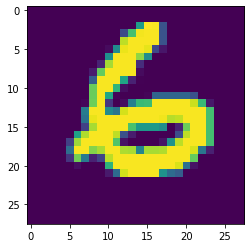

In [7]:
img_number = random.randint(0, training_images.shape[0])
plt.imshow(training_images[img_number])
print(training_labels[img_number])

All of the pixels values are between 0 and 255. If we are training a neural network, for various reasons it's easier that all values are between 0 and 1.

This can be done using `normalizing`

In [8]:
training_images  = training_images / 255.0
testing_images = testing_images / 255.0

# Defining the model using **Sequential** API

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import regularizers

In [11]:
model = Sequential([Flatten(input_shape=(28,28)), 
                    Dense(128, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.001)), 
                    Dense(10, activation=tf.nn.softmax)])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Define the **optimizer** and the **loss**

In [13]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [14]:
model.fit(training_images, training_labels, epochs=5, validation_split=0.15)

Epoch 1/5
1594/1594 [==============================] - 9s 4ms/step - loss: 0.4059 - accuracy: 0.9151 - val_loss: 0.2542 - val_accuracy: 0.9556
Epoch 2/5
1594/1594 [==============================] - 6s 4ms/step - loss: 0.2479 - accuracy: 0.9536 - val_loss: 0.2103 - val_accuracy: 0.9661
Epoch 3/5
1594/1594 [==============================] - 6s 4ms/step - loss: 0.2126 - accuracy: 0.9616 - val_loss: 0.1934 - val_accuracy: 0.9666
Epoch 4/5
1594/1594 [==============================] - 6s 4ms/step - loss: 0.1948 - accuracy: 0.9667 - val_loss: 0.1906 - val_accuracy: 0.9656
Epoch 5/5
1594/1594 [==============================] - 6s 4ms/step - loss: 0.1832 - accuracy: 0.9684 - val_loss: 0.1685 - val_accuracy: 0.9743


Evaluate the model on the test images

In [15]:
evaluation = model.evaluate(testing_images, testing_labels)
print("Accuracy on the testing images is {}".format(evaluation[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.1724 - accuracy: 0.9710
Accuracy on the testing images is 97.10000157356262
